### Project 2
### Nicholas Brown and David Trinidad

In [36]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt



In [37]:
df=pd.read_excel("HistoricalEnrollmentData.xlsx","revised")

In [38]:
df['Race_Title']=np.where(df['Race']==0,'All_Races','x')

In [39]:
# this allows us to see what number is assigned to which race without having to refer back to the excel sheet
df.loc[df.Race==1,'Race_Title']='White_Alone'
df.loc[df.Race==2,'Race_Title']='White_Alone_Non_Hispanic'
df.loc[df.Race==3,'Race_Title']='Black_Alone'
df.loc[df.Race==4,'Race_Title']='Asian'
df.loc[df.Race==5,'Race_Title']='Hispanic'
df.loc[df.Race==6,'Race_Title']='White_Alone_Or_Combination'
df.loc[df.Race==7,'Race_Title']='Black_Alone_Or_Combination'
df.loc[df.Race==8,'Race_Title']='Asian_Alone_Or_Combination'





### This allows us to view the names of the columns.  We are also able to see that some of the column names should be renamed.  For example, we see that the column titled year has an extra space after the last letter.  We also see that the column titled Total Enrolled contains two words, and that it is probably best to separate the words by using an underscore. 

In [40]:
my_list = df.columns.values.tolist()
my_list

['Year ',
 'Race',
 'Total Enrolled',
 'Nursery_School_Total',
 'Nursery_School_Public',
 'Nursery_School_Private',
 'Kindergarten_Total',
 'Kindergarten_Public',
 'Kindergarten_Private',
 'Elementary_Total',
 'Elementary_Public',
 'Elementary_Private',
 'High_School_Total',
 'High_School_Public',
 'High_School_Private',
 'College_Total',
 'College_Public',
 'College_Private',
 'College_FullTime',
 'footnote',
 'Race_Title']

In [41]:
# Renaming the columns
df = df.rename({'Year ': 'Year', 'Total Enrolled': 'Total_Enrolled'}, axis=1)  


In [42]:
# this allows us to see the value types for each column
# all of the columns with exception of footnote are expected to contain numerical values

df.dtypes

Year                        int64
Race                        int64
Total_Enrolled              int64
Nursery_School_Total      float64
Nursery_School_Public     float64
Nursery_School_Private     object
Kindergarten_Total          int64
Kindergarten_Public         int64
Kindergarten_Private        int64
Elementary_Total            int64
Elementary_Public           int64
Elementary_Private          int64
High_School_Total           int64
High_School_Public        float64
High_School_Private       float64
College_Total               int64
College_Public             object
College_Private           float64
College_FullTime           object
footnote                   object
Race_Title                 object
dtype: object

In [43]:
# this shows us that some of the NA values were inputted in excel with too many spaces
# as a result, pandas did not recgonize it as a nan value, which is why some of columns are type object

df.loc[df.Nursery_School_Private=='   NA']


,Year,Race,Total_Enrolled,Nursery_School_Total,Nursery_School_Public,Nursery_School_Private,Kindergarten_Total,Kindergarten_Public,Kindergarten_Private,Elementary_Total,...,Elementary_Private,High_School_Total,High_School_Public,High_School_Private,College_Total,College_Public,College_Private,College_FullTime,footnote,Race_Title
122,1964,1,44850,NaN,NaN,NA,2157,1795,362,27099,...,4718,11257,9898.0,1359.0,4338,2798,1540.0,NA,NaN,White_Alone
123,1963,1,43815,NaN,NaN,NA,2064,1699,365,26709,...,4527,10994,9782.0,1212.0,4050,2680,1370.0,NA,NaN,White_Alone
124,1962,1,42501,NaN,NaN,NA,2025,1667,358,26272,...,4350,10270,9217.0,1053.0,3934,2620,1314.0,NA,NaN,White_Alone
125,1961,1,42498,NaN,NaN,NA,1968,1618,350,26294,...,4281,9737,8635.0,1102.0,3498,2205,1293.0,NA,NaN,White_Alone
126,1960,1,40348,NaN,NaN,NA,1849,1485,364,26035,...,4339,9122,8124.0,999.0,3342,2126,1215.0,NA,NaN,White_Alone
127,1959,1,38857,NaN,NaN,NA,1758,1434,324,25395,...,4541,8586,7572.0,1014.0,3118,1960,1158.0,NA,NaN,White_Alone
128,1958,1,37662,NaN,NaN,NA,1769,1383,386,24380,...,4203,8484,7501.0,982.0,3030,1928,1101.0,NA,NaN,White_Alone
129,1957,1,36132,NaN,NaN,NA,1595,1258,337,23610,...,4015,7995,7121.0,874.0,2932,1924,1006.0,NA,NaN,White_Alone
130,1956,1,34641,NaN,NaN,NA,1544,1364,180,22740,...,3554,7670,6825.0,845.0,2687,1704,983.0,NA,NaN,White_Alone
131,1955,1,32929,NaN,NaN,NA,1484,1244,240,22185,...,3238,7036,6303.0,733.0,2224,1429,795.0,NA,NaN,White_Alone


In [44]:
# replace all of the values that contain too many spaces with nan values

df['Nursery_School_Private'] = df['Nursery_School_Private'].replace(['   NA'],np.nan)
df['Nursery_School_Public'] = df['Nursery_School_Public'].replace(['   NA'],np.nan)
df['College_Public'] = df['College_Public'].replace(['   NA'],np.nan)
df['College_FullTime'] = df['College_FullTime'].replace(['   NA'],np.nan)




In [45]:
# we see that are the columns are numerical because they are type int64 or float
# we are note expecting the footnote column to be numerical

df.dtypes

Year                        int64
Race                        int64
Total_Enrolled              int64
Nursery_School_Total      float64
Nursery_School_Public     float64
Nursery_School_Private    float64
Kindergarten_Total          int64
Kindergarten_Public         int64
Kindergarten_Private        int64
Elementary_Total            int64
Elementary_Public           int64
Elementary_Private          int64
High_School_Total           int64
High_School_Public        float64
High_School_Private       float64
College_Total               int64
College_Public            float64
College_Private           float64
College_FullTime          float64
footnote                   object
Race_Title                 object
dtype: object

In [46]:
df=df.set_index('Year')

In [47]:
def graph(dataFrame, complete_total, var1, var2, var3 ):
    
    d = dataFrame.loc[df["Race"] == 0]
    d1 = dataFrame.loc[df["Race"] == 1]
    d2 = dataFrame.loc[df["Race"] == 2]
    d3 = dataFrame.loc[df["Race"] == 3]
    d4 = dataFrame.loc[df["Race"] == 4]
    d5 = dataFrame.loc[df["Race"] == 5]
    
    
    fig=plt.figure(figsize=(10,8))
    
    ax1=fig.add_subplot(2,2,1)
    ax2=fig.add_subplot(2,2,2)
    ax3=fig.add_subplot(2,2,3)
    ax4=fig.add_subplot(2,2,4)
    
    # needed to do after subplots were created
    fig.subplots_adjust(hspace=.4, wspace=.3)
    
    
    ax1.plot(d[complete_total], label='all races')
    ax1.plot(d1[complete_total], label='white alone')
    ax1.plot(d2[complete_total], label='white alone non-hispanic')
    ax1.plot(d3[complete_total], label='black alone')
    ax1.plot(d4[complete_total], label='asian')
    ax1.plot(d5[complete_total], label='hispanic')
    
    
    ax2.plot(d[var1], label='all races')
    ax2.plot(d1[var1], label='white alone')
    ax2.plot(d2[var1], label='white alone non-hispanic')
    ax2.plot(d3[var1], label='black alone')
    ax2.plot(d4[var1], label='asian')
    ax2.plot(d5[var1], label='hispanic')
    
    ax3.plot(d[var2], label='all races')
    ax3.plot(d1[var2], label='white alone')
    ax3.plot(d2[var2], label='white alone non-hispanic')
    ax3.plot(d3[var2], label='black alone')
    ax3.plot(d4[var2], label='asian')
    ax3.plot(d5[var2], label='hispanic')
    
    ax4.plot(d[var3], label='all races')
    ax4.plot(d1[var3], label='white alone')
    ax4.plot(d2[var3], label='white alone non-hispanic')
    ax4.plot(d3[var3], label='black alone')
    ax4.plot(d4[var3], label='asian')
    ax4.plot(d5[var3], label='hispanic')
    
    
    
    
    
    # setting titles for axes
    ax1.set_title(complete_total + ' enrollment')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(complete_total)
    
    
    ax1.set_title(complete_total + ' enrollment')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(complete_total)
    
    ax2.set_title(var1 + ' enrollment')
    ax2.set_xlabel('Year')
    ax2.set_ylabel(var1)
    
    ax3.set_title(var2 + ' enrollment')
    ax3.set_xlabel('Year')
    ax3.set_ylabel(var2)

    ax4.set_title(var3 + ' enrollment')
    ax4.set_xlabel('Year')
    ax4.set_ylabel(var3)
    
    
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    

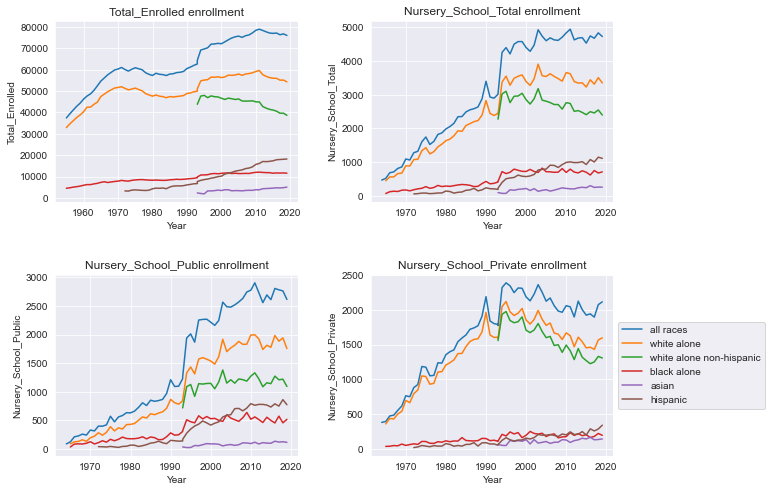

In [48]:
graph(df, "Total_Enrolled", "Nursery_School_Total" ,"Nursery_School_Public" , "Nursery_School_Private") 

In [49]:
### We see that if we look at the the 

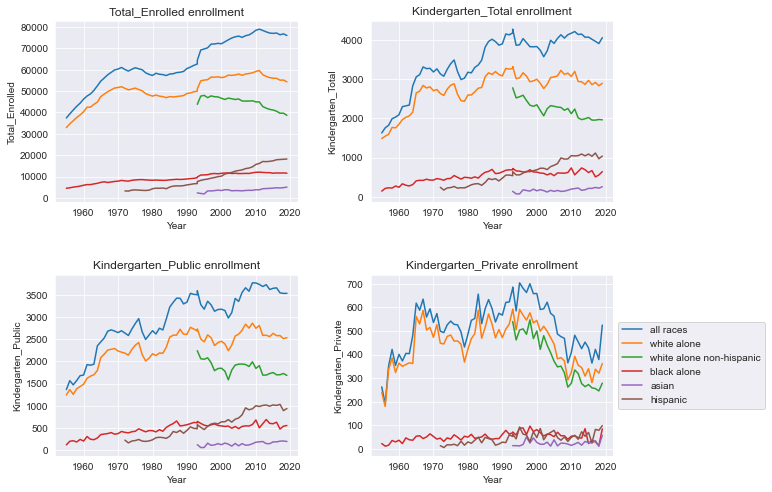

In [50]:
graph(df, "Total_Enrolled", "Kindergarten_Total" ,"Kindergarten_Public" , "Kindergarten_Private") 

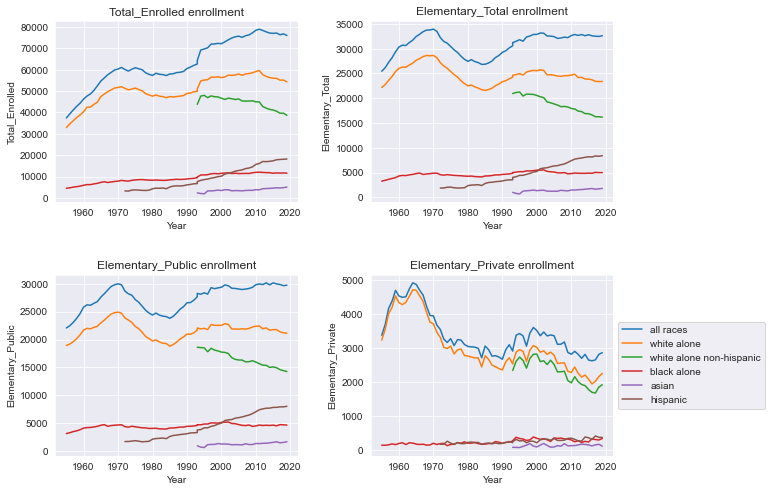

In [51]:
graph(df, "Total_Enrolled", "Elementary_Total" ,"Elementary_Public" , "Elementary_Private") 

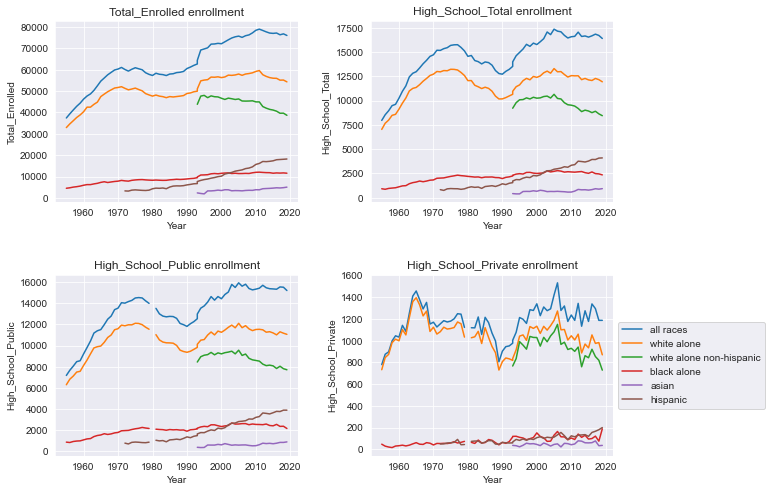

In [52]:
graph(df, "Total_Enrolled", "High_School_Total" ,"High_School_Public" , "High_School_Private") 

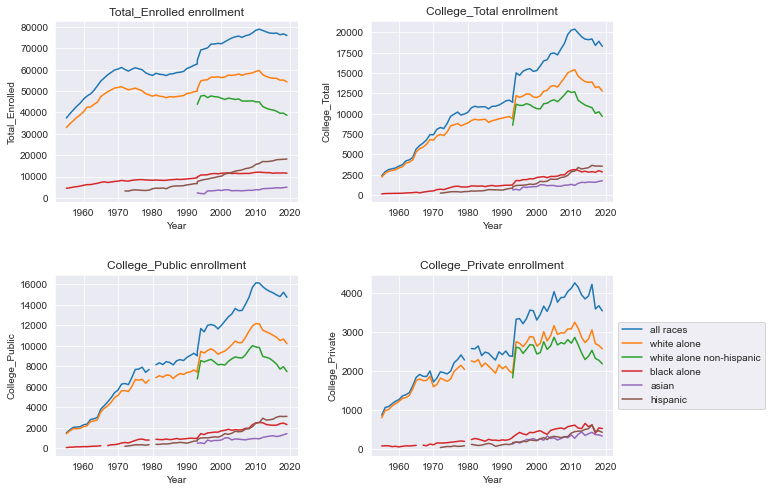

In [53]:
graph(df, "Total_Enrolled", "College_Total" ,"College_Public" , "College_Private") 

In [54]:
def enrollment_by_level(dataFrame,race, n, k, e,h,c ):
    
    d1 = dataFrame.loc[df["Race"] == race]
    name_of_race = d1['Race_Title'].values[0]
    
    
    fig=plt.figure(figsize=(10,8))
    
    ax1=fig.add_subplot(1,1,1)
    
    
    ax1.plot(d1[n], label='Nursery School')
    ax1.plot(d1[k], label='Kindergarten')
    ax1.plot(d1[e], label='Elementary')
    ax1.plot(d1[h], label='High School')
    ax1.plot(d1[c], label='College')
    
    
    
    # setting titles for axes
    ax1.set_title('Enrollment at each level for ' + name_of_race)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Enrollment Total')
    
    
   
    
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    


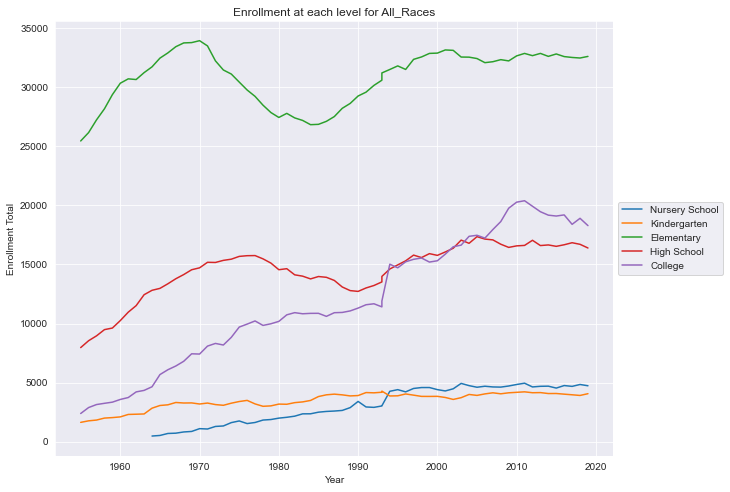

In [55]:
enrollment_by_level(df,0,'Nursery_School_Total', 'Kindergarten_Total', 'Elementary_Total','High_School_Total','College_Total' )


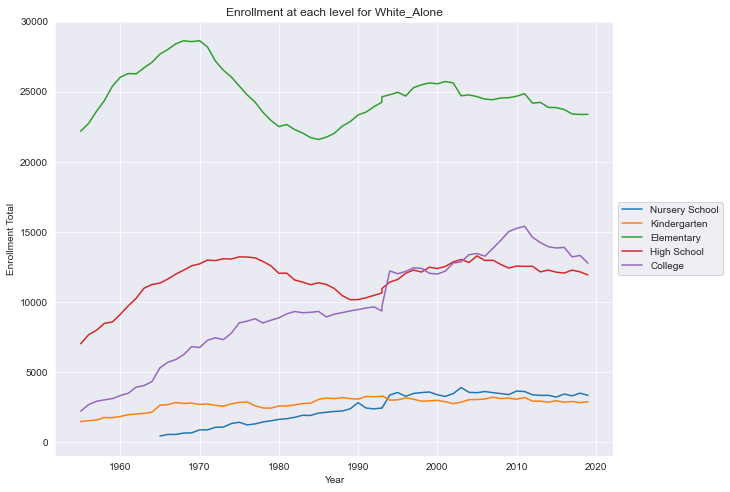

In [56]:
enrollment_by_level(df,1,'Nursery_School_Total', 'Kindergarten_Total', 'Elementary_Total','High_School_Total','College_Total' )


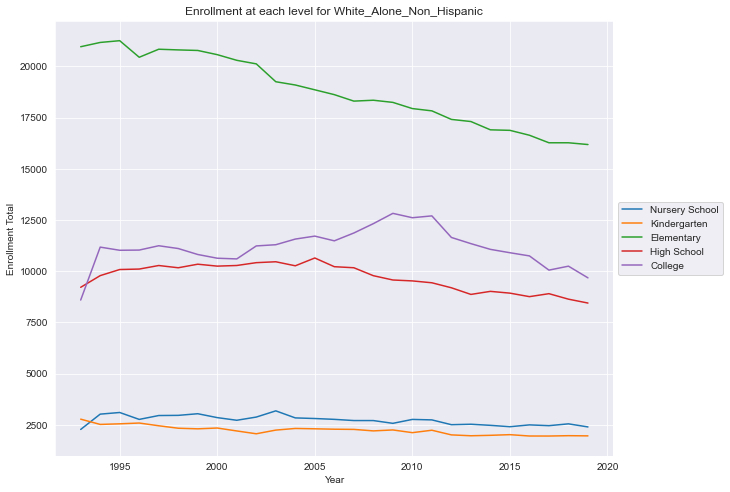

In [57]:
enrollment_by_level(df,2,'Nursery_School_Total', 'Kindergarten_Total', 'Elementary_Total','High_School_Total','College_Total' )


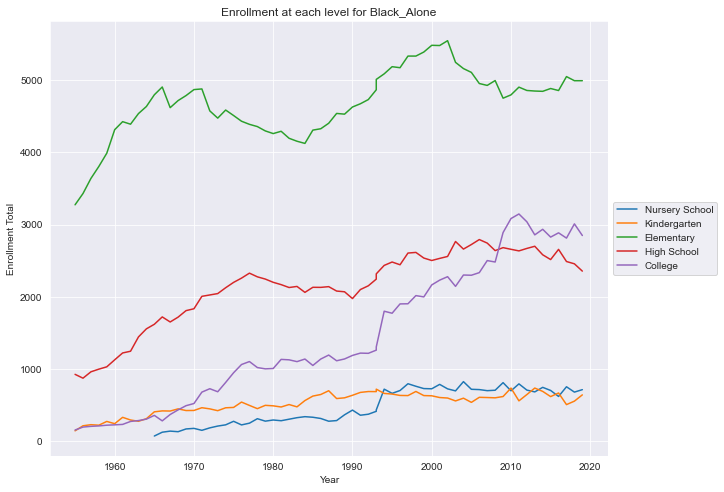

In [58]:
enrollment_by_level(df,3,'Nursery_School_Total', 'Kindergarten_Total', 'Elementary_Total','High_School_Total','College_Total' )


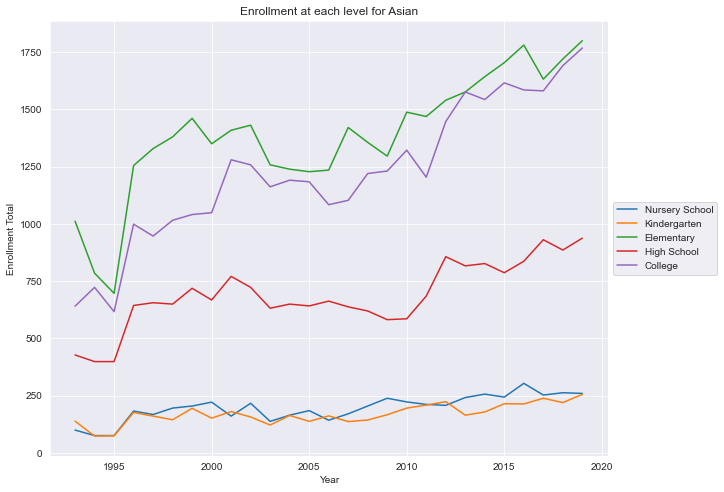

In [59]:
enrollment_by_level(df,4,'Nursery_School_Total', 'Kindergarten_Total', 'Elementary_Total','High_School_Total','College_Total' )


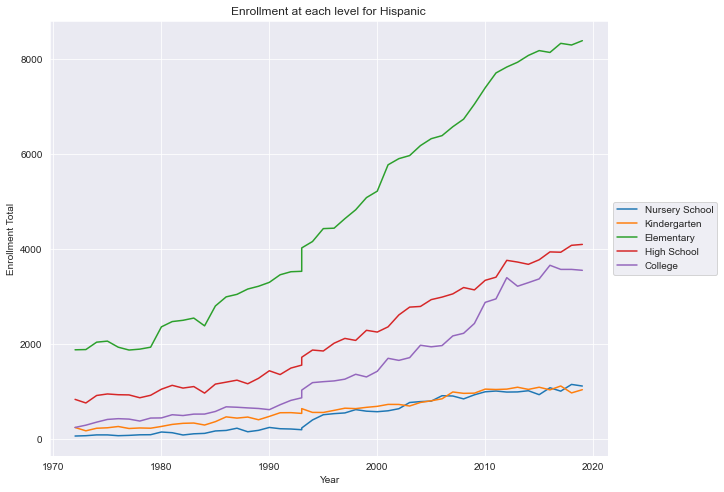

In [60]:
enrollment_by_level(df,5,'Nursery_School_Total', 'Kindergarten_Total', 'Elementary_Total','High_School_Total','College_Total' )


### Loading data about dropout rates for grades 10-12

In [61]:
df_drop=pd.read_excel("DropOut.xlsx","revised_drop")

In [62]:
df_drop=df_drop.set_index('Year')


In [63]:
df_drop

,total _students_grades_10-12,dropouts,dropout_rate,Race,footnote
Year,,,,,
2019,11694,473,4.0,0,NaN
2018,11638,518,4.5,0,NaN
2017,11719,523,4.5,0,NaN
2016,11807,532,4.5,0,NaN
2015,11646,535,4.6,0,NaN
...,...,...,...,...,...
2007,483,30,6.2,8,NaN
2006,542,23,4.2,8,NaN
2005,525,8,1.5,8,NaN


In [64]:
def percentChange(dataFrame,dataFrame2,race):
    "'This function creates a column for the percentage for both enrollment and dropouts.  It also graphs the percentage change for both enrollment and dropouts.'"
    
    
    # works with drop out data
    d2 = dataFrame2.loc[dataFrame2["Race"] == race]
    
    # works with enrollment data
    d1 = dataFrame.loc[df["Race"] == race]
    name_of_race = d1['Race_Title'].values[0]
    
    
    
    lst0 = d1['High_School_Total'].tolist()

    # adds a column that shows the enrollment percentage change each year
    sum=0
    enroll_percent_change=[]
    for l in lst0:
        if sum == 0:
            count=0
            enroll_percent_change.append(0)
            sum+=1
        else:
            enroll_percent_change.append(round(((l-lst0[count])/(lst0[count]))*100,2))
            count+=1
    
    
    temp=d1.assign(enroll_percent_change=enroll_percent_change)

    # adds a column that shows percentage change of dropout each year
    lst1 = d2['dropouts'].tolist()
    sum=0
    dropout_percent_change=[]
    for l in lst1:
        if sum == 0:
            count=0
            dropout_percent_change.append(0)
            sum+=1
        else:
            dropout_percent_change.append(round(((l-lst1[count])/(lst1[count]))*100,2))
            count+=1
    
    
    temp2=d2.assign(dropout_percent_change=dropout_percent_change)

    
    fig=plt.figure(figsize=(10,8))
    
    ax1=fig.add_subplot(1,1,1)
    
    
    ax1.plot(temp2["dropout_percent_change"], label='Dropout Percent Change')
    ax1.plot(temp["enroll_percent_change"], label='High School Enrollment Percent Change')
    

    
    
    
    # setting titles for axes
    ax1.set_title('Dropout and Enrollment Percentage Change for ' + name_of_race)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percent Change')
    
    
   
    
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### The following graphs compare the percentage change in dropouts and enrollments for each race.

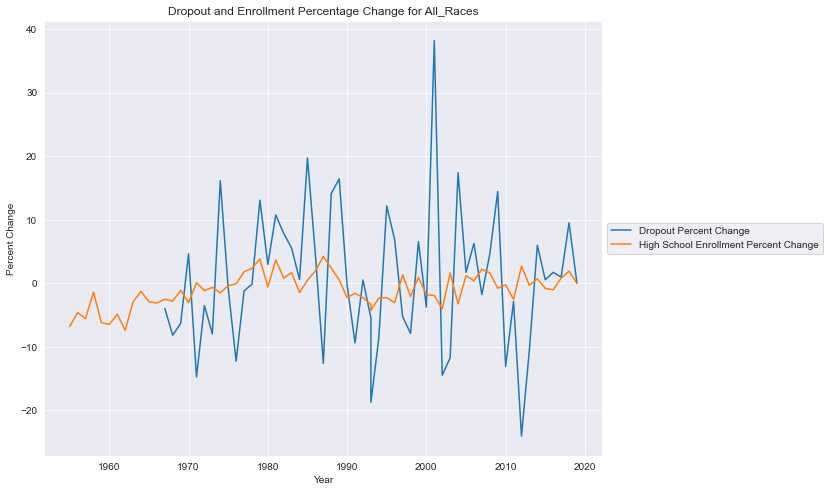

In [65]:
percentChange(df,df_drop,0)

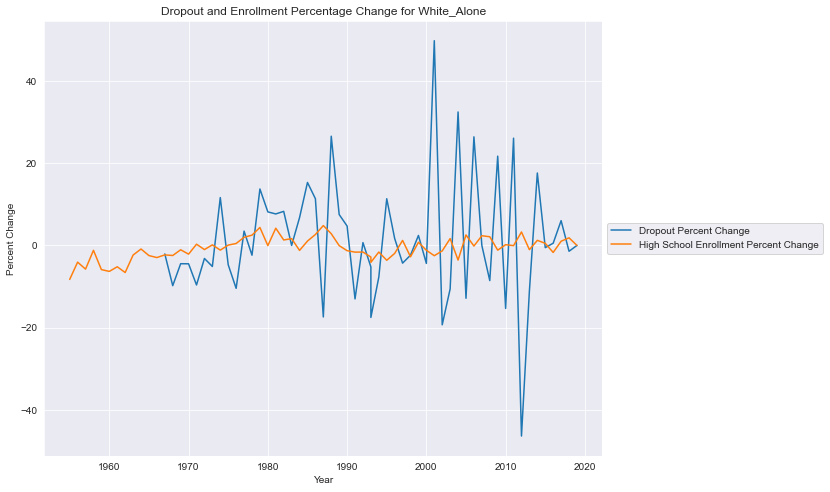

In [66]:
percentChange(df,df_drop,1)

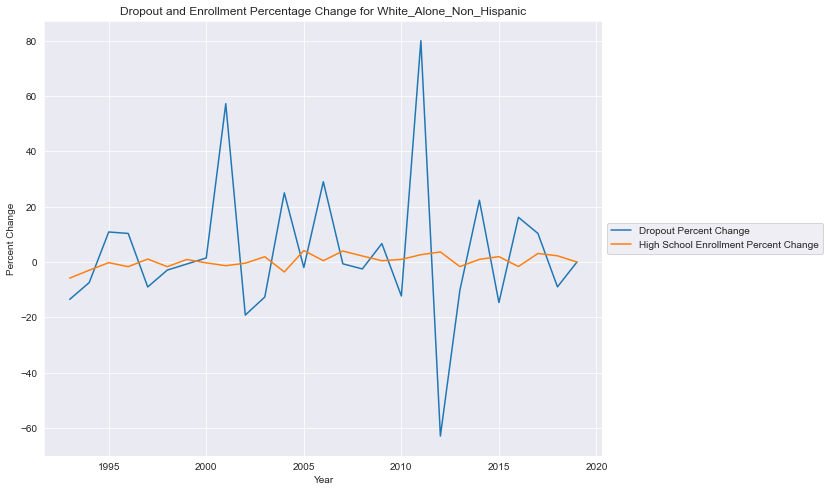

In [67]:
percentChange(df,df_drop,2)

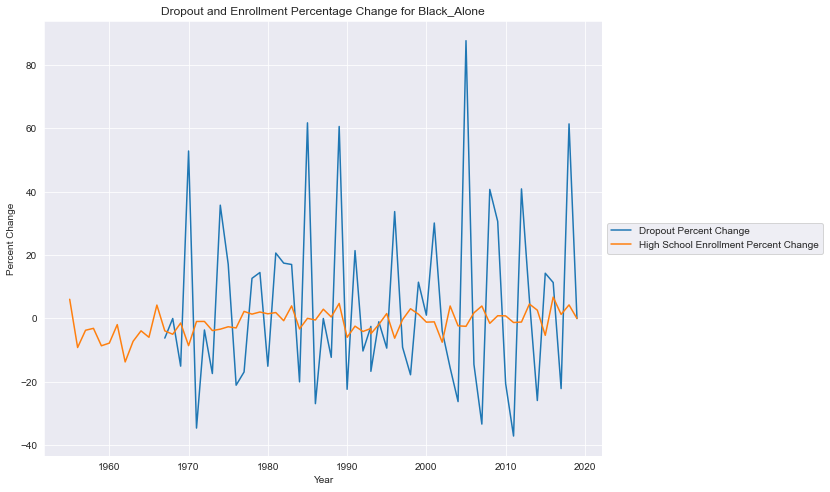

In [68]:
percentChange(df,df_drop,3)

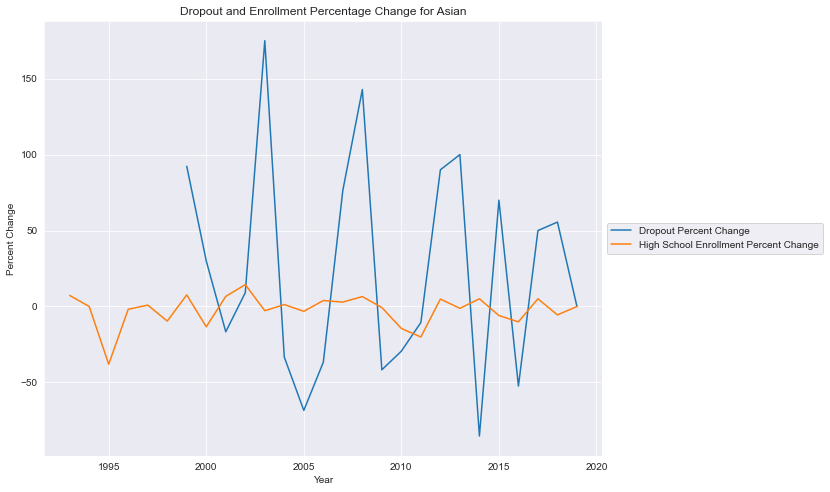

In [69]:
percentChange(df,df_drop,4)

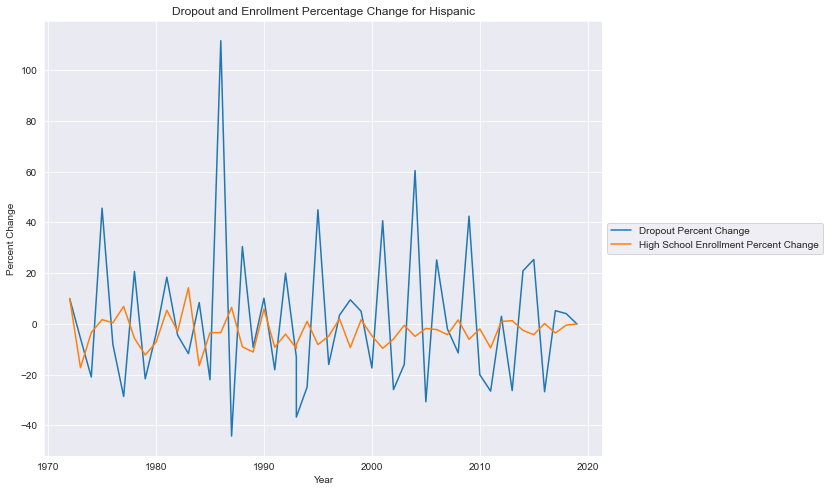

In [70]:
percentChange(df,df_drop,5)